In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

from datetime import timedelta

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.api import Holt
import warnings
warnings.filterwarnings('ignore')

In [2]:
covid_19_clean_complete= pd.read_csv('/Users/aanchaljain/Desktop/covid_19_clean_complete.csv')

In [3]:
covid_19_clean_complete.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [4]:
covid_19_clean_complete.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


In [5]:
covid_19_clean_complete.replace(np.nan,'',regex=True)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [6]:
covid_19_clean_complete['Country/Region'].value_counts()

China               6204
Canada              2256
France              2068
United Kingdom      2068
Australia           1504
                    ... 
Panama               188
Syria                188
Cote d'Ivoire        188
Papua New Guinea     188
Lesotho              188
Name: Country/Region, Length: 187, dtype: int64

In [7]:
covid_19_clean_complete['Country/Region'].value_counts().plot(kind='bar',figsize=[700,100])
                                                                            
                                                                               

In [8]:
covid_19_clean_complete.isnull().sum()


Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

# Relating the variables with scatter plot


<Figure size 28800x432 with 0 Axes>

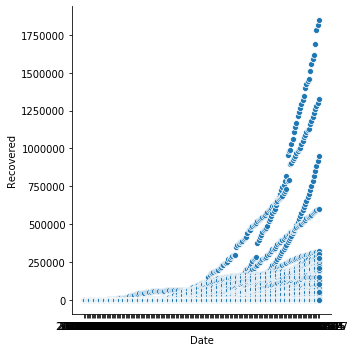

In [9]:
plt.figure(figsize=(400,6))
sns.relplot(x="Date",y="Recovered",data=covid_19_clean_complete)

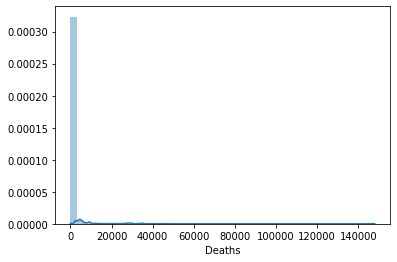

In [10]:
sns.distplot(covid_19_clean_complete.Deaths)

<Figure size 4320x36000 with 0 Axes>

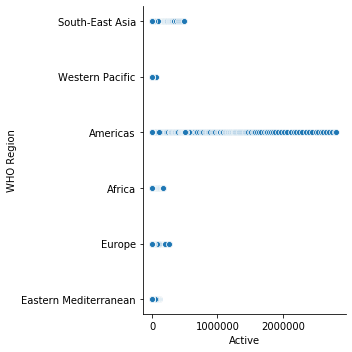

In [11]:
plt.figure(figsize=(60,500))
sns.relplot(x="Active",y="WHO Region",data=covid_19_clean_complete)
plt.show()

In [32]:
covid_19_clean_complete["Date"]=pd.to_datetime(covid_19_clean_complete["Date"])

# Grouping different types of cases as per the date

In [14]:
datewise = covid_19_clean_complete.groupby(["Date"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})

In [15]:
print("Basic information")
print("Total no. of confirmed cases around the world",datewise["Confirmed"].iloc[-1])
print("Total no. of recovered cases around the world",datewise["Recovered"].iloc[-1])
print("Total no. of deaths cases around the world",datewise["Deaths"].iloc[-1])
print("Total no. of active cases around the world",(datewise["Confirmed"].iloc[-1]-datewise["Recovered"].iloc[-1]))
print("Total no. of closed cases around the world",(datewise["Confirmed"].iloc[-1]+datewise["Recovered"].iloc[-1]))

Basic information
Total no. of confirmed cases around the world 16480485
Total no. of recovered cases around the world 9468087
Total no. of deaths cases around the world 654036
Total no. of active cases around the world 7012398
Total no. of closed cases around the world 25948572


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

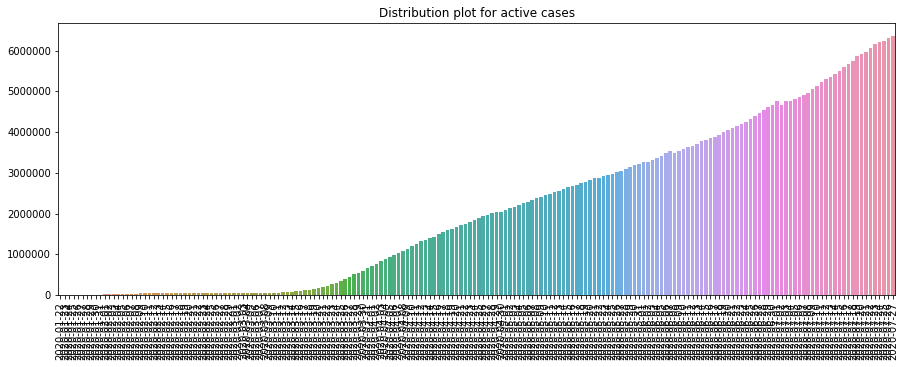

In [16]:
plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.date,y=datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"])
plt.title("Distribution plot for active cases")
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Weekly Progress of different types of cases')

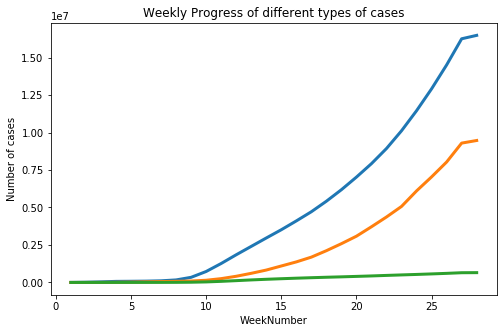

In [17]:
datewise["WeekofYear"]=datewise.index.weekofyear
week_num=[]
weekwise_confirmed=[]
weekwise_deaths=[]
weekwise_recovered=[]
w=1
for i in list(datewise["WeekofYear"].unique()):
    weekwise_confirmed.append(datewise[datewise["WeekofYear"]==i]["Confirmed"].iloc[-1])
    weekwise_recovered.append(datewise[datewise["WeekofYear"]==i]["Recovered"].iloc[-1])
    weekwise_deaths.append(datewise[datewise["WeekofYear"]==i]["Deaths"].iloc[-1])
    week_num.append(w)
    w=w+1
plt.figure(figsize=(8,5))
plt.plot(week_num,weekwise_confirmed,linewidth=3)
plt.plot(week_num,weekwise_recovered,linewidth=3)
plt.plot(week_num,weekwise_deaths,linewidth=3)
plt.xlabel("WeekNumber")
plt.ylabel("Number of cases")
plt.title("Weekly Progress of different types of cases")

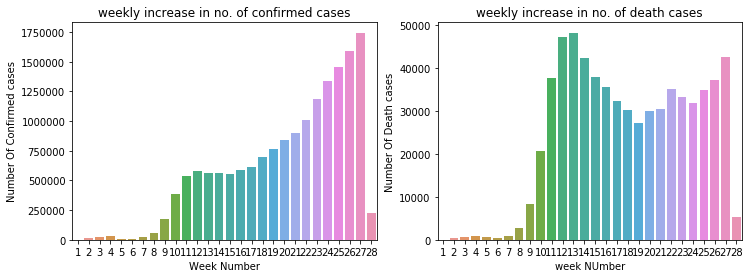

In [18]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,4))
sns.barplot(x=week_num,y=pd.Series(weekwise_confirmed).diff().fillna(0),ax=ax1)
sns.barplot(x=week_num,y=pd.Series(weekwise_deaths).diff().fillna(0),ax=ax2)
ax1.set_xlabel("Week Number")
ax2.set_xlabel("week NUmber")
ax1.set_ylabel("Number Of Confirmed cases")
ax2.set_ylabel("Number Of Death cases")
ax1.set_title("weekly increase in no. of confirmed cases")
ax2.set_title("weekly increase in no. of death cases")
plt.show()


Average increase in number of confirmed cases everyday: Date
2020-01-22         0.0
2020-01-23        99.0
2020-01-24       287.0
2020-01-25       493.0
2020-01-26       684.0
                ...   
2020-07-23    282756.0
2020-07-24    281164.0
2020-07-25    255545.0
2020-07-26    204606.0
2020-07-27    228689.0
Name: Confirmed, Length: 188, dtype: float64
Average increase in number of recovered cases everyday: Date
2020-01-22         0.0
2020-01-23         2.0
2020-01-24         6.0
2020-01-25         3.0
2020-01-26        13.0
                ...   
2020-07-23    169714.0
2020-07-24    228736.0
2020-07-25    219038.0
2020-07-26    134721.0
2020-07-27    174623.0
Name: Recovered, Length: 188, dtype: float64
Average increase in number of deaths cases everyday: Date
2020-01-22       0.0
2020-01-23       1.0
2020-01-24       8.0
2020-01-25      16.0
2020-01-26      14.0
               ...  
2020-07-23    9966.0
2020-07-24    6144.0
2020-07-25    4867.0
2020-07-26    4104.0
2020-07-27    

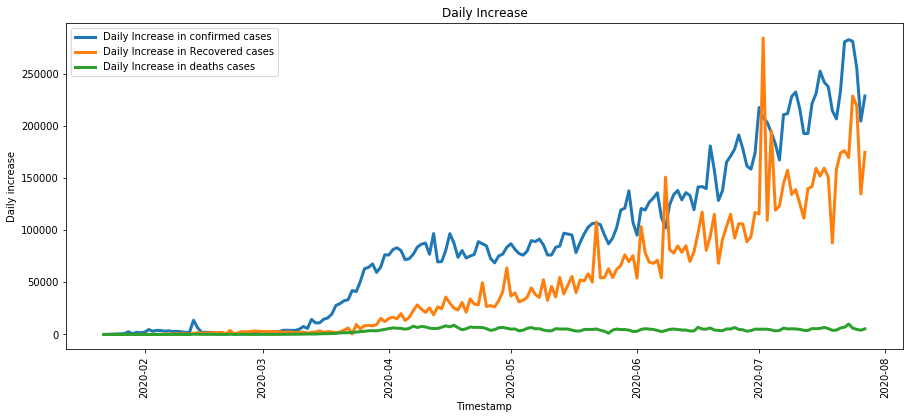

In [19]:
print("Average increase in number of confirmed cases everyday:",np.round(datewise["Confirmed"].diff().fillna(0)))
print("Average increase in number of recovered cases everyday:",np.round(datewise["Recovered"].diff().fillna(0)))
print("Average increase in number of deaths cases everyday:",np.round(datewise["Deaths"].diff().fillna(0)))

plt.figure(figsize=(15,6))
plt.plot(datewise["Confirmed"].diff().fillna(0),label="Daily Increase in confirmed cases",linewidth=3)
plt.plot(datewise["Recovered"].diff().fillna(0),label="Daily Increase in Recovered cases",linewidth=3)
plt.plot(datewise["Deaths"].diff().fillna(0),label="Daily Increase in deaths cases",linewidth=3)
plt.xlabel("Timestamp")
plt.ylabel("Daily increase")
plt.title("Daily Increase")
plt.legend()
plt.xticks(rotation=90)
plt.show()

# Country Wise analysis
Calculating Country Wise Mortality rate


In [20]:
countrywise= covid_19_clean_complete[covid_19_clean_complete["Date"]==covid_19_clean_complete["Date"].max()].groupby(["Country/Region"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"}) 
countrywise["Mortality"]=(countrywise["Deaths"]/countrywise["Recovered"])*100
countrywise["Recovered"]=(countrywise["Recovered"]/countrywise["Confirmed"])*100

Text(0.5, 1.0, 'Top 15 countries as per number of death cases')

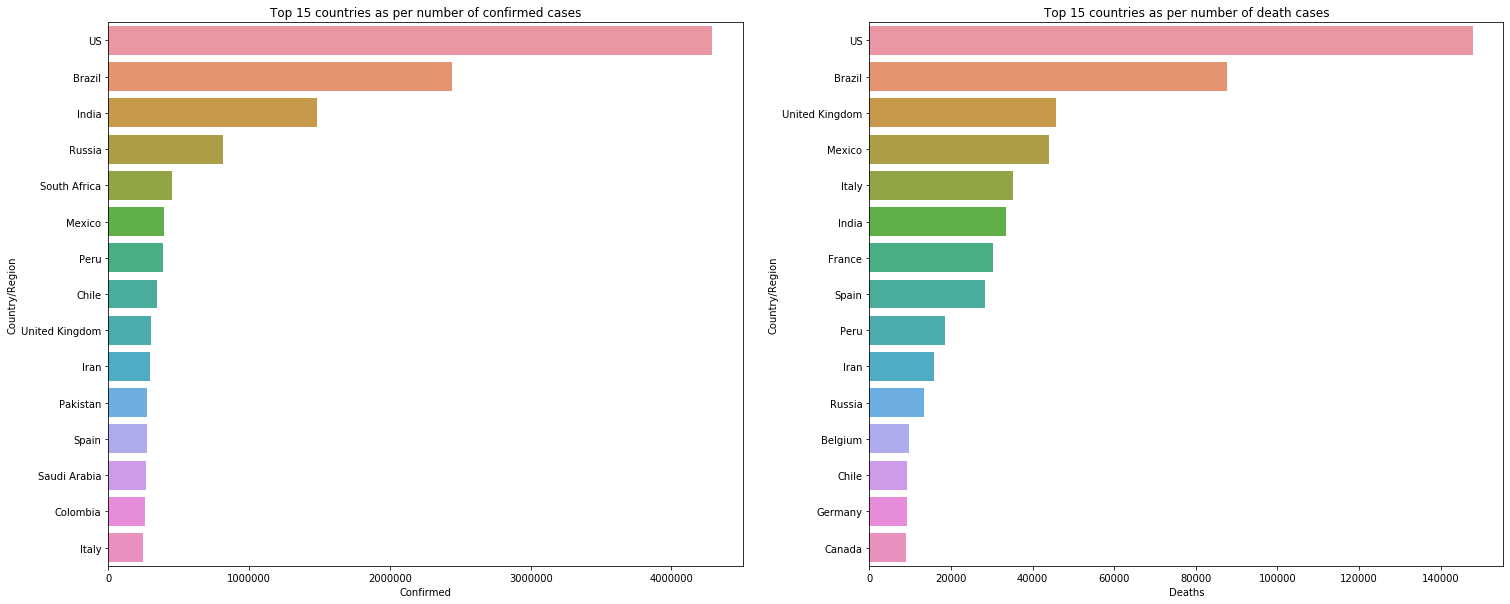

In [21]:

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(25,10))
top_15confirmed=countrywise.sort_values(["Confirmed"],ascending=False).head(15)
top_15deaths=countrywise.sort_values(["Deaths"],ascending=False).head(15)
sns.barplot(x=top_15confirmed["Confirmed"],y=top_15confirmed.index,ax=ax1)
ax1.set_title("Top 15 countries as per number of confirmed cases")
sns.barplot(x=top_15deaths["Deaths"],y=top_15deaths.index,ax=ax2)
ax2.set_title("Top 15 countries as per number of death cases")


In [22]:
#Data Analysis for India
india_data=covid_19_clean_complete[covid_19_clean_complete["Country/Region"]=="India"]
datewise_india=india_data.groupby(["Date"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
print(datewise_india.iloc[-1])
print("Total active cases",datewise_india["Confirmed"].iloc[-1]-datewise_india["Recovered"].iloc[-1]-datewise_india["Deaths"].iloc[-1])
print("Total closed cases",datewise_india["Recovered"].iloc[-1]+datewise_india["Deaths"].iloc[-1])

Confirmed    1480073
Recovered     951166
Deaths         33408
Name: 2020-07-27 00:00:00, dtype: int64
Total active cases 495499
Total closed cases 984574


Text(0.5, 1.0, 'Weekly Progress of different types of cases')

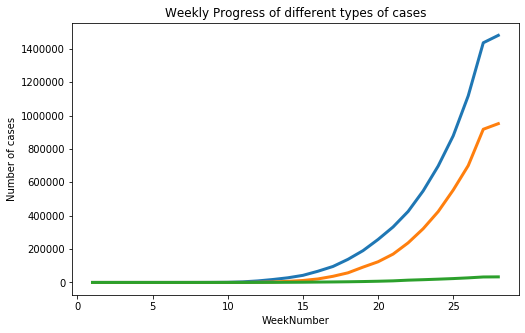

In [23]:
datewise_india["WeekofYear"]=datewise_india.index.weekofyear
week_num_india=[]
india_weekwise_confirmed=[]
india_weekwise_deaths=[]
india_weekwise_recovered=[]
w=1
for i in list(datewise_india["WeekofYear"].unique()):
    india_weekwise_confirmed.append(datewise_india[datewise_india["WeekofYear"]==i]["Confirmed"].iloc[-1])
    india_weekwise_recovered.append(datewise_india[datewise_india["WeekofYear"]==i]["Recovered"].iloc[-1])
    india_weekwise_deaths.append(datewise_india[datewise_india["WeekofYear"]==i]["Deaths"].iloc[-1])
    week_num_india.append(w)
    w=w+1
plt.figure(figsize=(8,5))
plt.plot(week_num_india,india_weekwise_confirmed,linewidth=3)
plt.plot(week_num_india,india_weekwise_recovered,linewidth=3)
plt.plot(week_num_india,india_weekwise_deaths,linewidth=3)
plt.xlabel("WeekNumber")
plt.ylabel("Number of cases")
plt.title("Weekly Progress of different types of cases")

In [24]:
max_ind=datewise_india["Confirmed"].max()
china_data=covid_19_clean_complete[covid_19_clean_complete["Country/Region"]=="Mainland China"]
us_data=covid_19_clean_complete[covid_19_clean_complete["Country/Region"]=="US"]
Italy_data=covid_19_clean_complete[covid_19_clean_complete["Country/Region"]=="Italy"]
datewise_china=china_data.groupby(["Date"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
datewise_us=us_data.groupby(["Date"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
datewise_italy=Italy_data.groupby(["Date"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
print("It took",datewise_india[datewise_india["Confirmed"]>0].shape[0],"days to reach",max_ind,"Confirmed_Cases")
print("It took",datewise_china[(datewise_china["Confirmed"]>0) &(datewise_china["Confirmed"]<=max_ind)].shape[0],"days to reach Confirmed_Cases")
print("It took",datewise_us[(datewise_us["Confirmed"]>0) &(datewise_us["Confirmed"]<=max_ind)].shape[0],"days to reach Confirmed_Cases")
print("It took",datewise_italy[(datewise_italy["Confirmed"]>0) &(datewise_italy["Confirmed"]<=max_ind)].shape[0],"days to reach Confirmed_Cases")

                               
                               
                               

It took 180 days to reach 1480073 Confirmed_Cases
It took 0 days to reach Confirmed_Cases
It took 116 days to reach Confirmed_Cases
It took 179 days to reach Confirmed_Cases


In [25]:
datewise["days since"]=datewise.index-datewise.index[0]
datewise["days since"]=datewise["days since"].dt.days
train_m1=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid_m1=datewise.iloc[:int(datewise.shape[0]*0.95):]
model_scores=[]


In [26]:
lin_reg=LinearRegression(normalize=True)
svm=SVR(C=1,degree=5,kernel='poly',epsilon=0.001)
lin_reg.fit(np.array(train_m1["days since"]).reshape(-1,1),np.array(train_m1["Confirmed"]).reshape(-1,1))
svm.fit(np.array(train_m1["days since"]).reshape(-1,1),np.array(train_m1["Confirmed"]).reshape(-1,1))

SVR(C=1, cache_size=200, coef0=0.0, degree=5, epsilon=0.001, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [27]:
prediction_valid_lin_reg=lin_reg.predict(np.array(valid_m1["days since"]).reshape(-1,1))
prediction_valid_svm=svm.predict(np.array(valid_m1["days since"]).reshape(-1,1))


In [28]:
new_date=[]
new_prediction_lr=[]
new_prediction_svm=[]
for i in range(1,18):
    new_date.append(datewise.index[-1]+timedelta(days=i))
    new_prediction_lr.append(lin_reg.predict(np.array(datewise["days since"].max()+i).reshape(-1,1))[0][0])
    new_prediction_svm.append(svm.predict(np.array(datewise["days since"].max()+i).reshape(-1,1))[0])
pd.set_option("display.float_format",lambda x: '%.f'% x)
model_prediction=pd.DataFrame(zip(new_date,new_prediction_lr,new_prediction_svm),columns=["Dates","LR","SVR"])
model_prediction.head(10)
    



,Dates,LR,SVR
0,2020-07-28,11187152,11475450
1,2020-07-29,11261488,11724031
2,2020-07-30,11335825,11977928
3,2020-07-31,11410161,12237227
4,2020-08-01,11484498,12502013
5,2020-08-02,11558834,12772374
6,2020-08-03,11633171,13048396
7,2020-08-04,11707507,13330169
8,2020-08-05,11781844,13617781
9,2020-08-06,11856180,13911324


In [29]:
model_train=datewise.iloc[:int(datewise.shape[0]*0.85)]
valid=datewise.iloc[int(datewise.shape[0]*0.85):]


In [30]:
holt=Holt(np.asarray(model_train["Confirmed"])).fit(smoothing_level=1.4,smoothing_slope=0.2)
y_pred=valid.copy()
y_pred["Holt"]=holt.forecast(len(valid))



In [31]:
holt_new_date=[]
holt_new_prediction=[]
for i in range(1,18):
    holt_new_date.append(datewise.index[-1]+timedelta(days=i))
    holt_new_prediction.append(holt.forecast((len(valid)+i))[-1])

model_prediction["Holts Linear Model Prediction"]=holt_new_prediction
model_prediction.head()
    

,Dates,LR,SVR,Holts Linear Model Prediction
0,2020-07-28,11187152,11475450,15039018
1,2020-07-29,11261488,11724031,15203147
2,2020-07-30,11335825,11977928,15367276
3,2020-07-31,11410161,12237227,15531405
4,2020-08-01,11484498,12502013,15695535
